# Import software libraries and load the dataset #

In [1]:
import sys                                             # Read system parameters.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb                                   # Perform data visualization.
import sklearn                                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Seaborn {}'.format(sb.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
boston = datasets.load_boston()
print('Loaded {} records.'.format(len(boston.data)))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- Matplotlib 3.0.3
- Seaborn 0.9.0
- scikit-learn 0.20.3

Loaded 506 records.


# Get acquainted with the dataset

In [2]:
# Convert array to pandas DataFrame.
data_raw = pd.DataFrame(boston['data'], columns = boston['feature_names'])
data_raw['target'] = boston['target']

print(data_raw.info())      # View data types and see if there are missing entries.
data_raw.head(10)           # View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Examine the distribution of various features

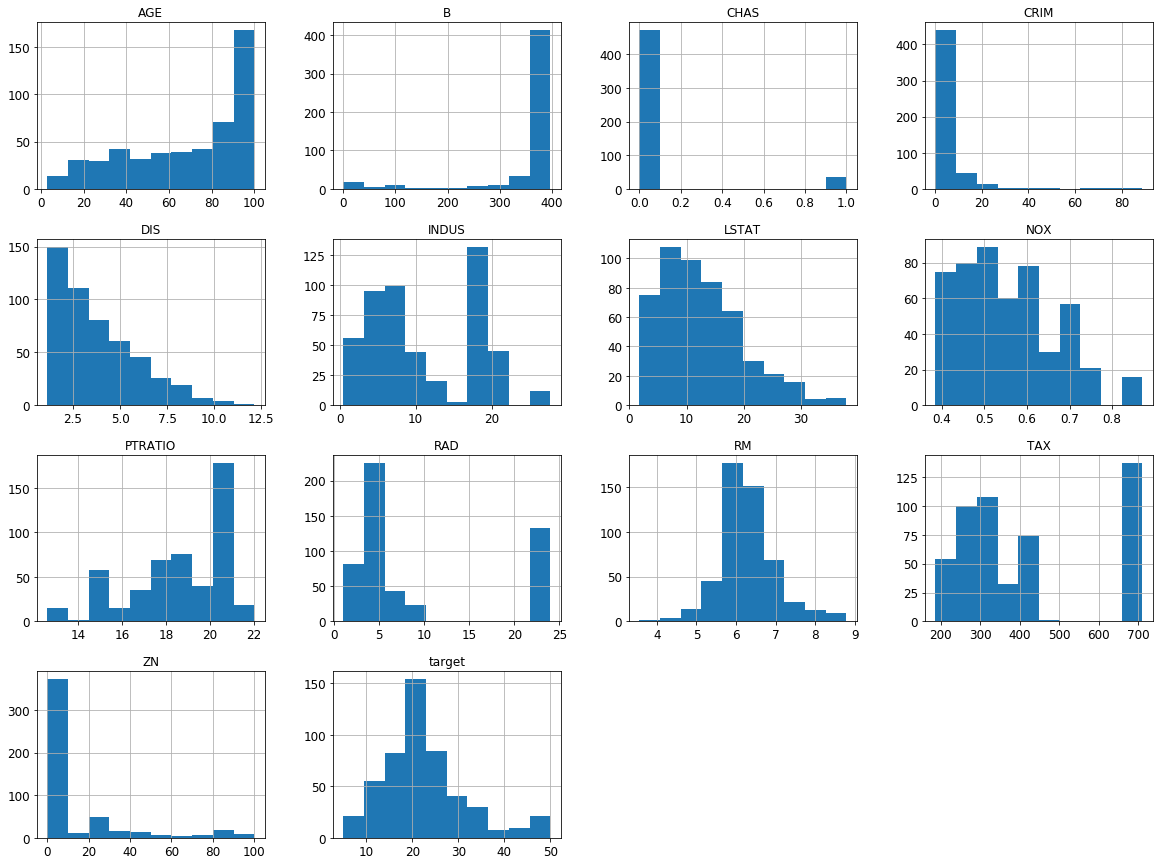

<Figure size 432x288 with 0 Axes>

In [8]:
# Use Matplotlib to plot figures.
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_raw.hist(figsize=(20,15));
plt.figure();

# Examine a general summary of statistics

In [5]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe())

        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  target  
count   506.00 506.00 506.00  506.00  
mean     18.46 356.67  12.65   22.53  
std       2.16  91.29   7.14    9.20  
min      12.60   0.32   1.73    5.00  
25%      17.40 375.38   6.95   17.02  
50%      19.05 391.44  11.36   21.20  
75%      20.20 

# Look for columns that correlate with `target` (median house value)#

In [6]:
# Correlations between numeric features and 'target'.
print('Correlations with median house value')
print(data_raw.corr()['target'].sort_values(ascending=False))

Correlations with median house value
target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64


# Split the label from the dataset

In [7]:
# 'target' is the dependent variable (value to be predicted), so it will be
# removed from the training data and put into a separate DataFrame for labels.
label_columns = ['target']

X, y = data_raw.loc[:, 'CRIM': 'LSTAT'], data_raw[label_columns]

# Compare the number of columns in the original data to the new training and label sets.
print(f'Original set:    {data_raw.shape}')
print('------------------------------')
print(f'Training data:   {X.shape}')
print(f'Training labels: {y.shape}')

Original set:    (506, 14)
------------------------------
Training data:   (506, 13)
Training labels: (506, 1)


# Drop columns that won't be used for training

In [8]:
# Drop column from dataset that shows weak correlation.
def drop_unused(dataset):
    
    print('Columns before drop:\n\n{}\n'.format(list(dataset.columns)))
        
    dataset = dataset.drop(['CHAS'], axis = 1)
    
    print('Columns after drop:\n\n{}\n'.format(list(dataset.columns)))
    return dataset

X = drop_unused(X.copy())

Columns before drop:

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Columns after drop:

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']



# Standardize the features

In [9]:
def standardize(X):
    result = X.copy()
    
    for feature in X.columns:
        result[feature] = (X[feature] - X[feature].mean()) / X[feature].std()  # z-score formula.
        
    return result

X = standardize(X)

print('The features have been standardized.')

The features have been standardized.


In [10]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(X.describe())

        CRIM     ZN  INDUS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   506.00   
mean    0.00   0.00  -0.00   0.00  -0.00  -0.00   0.00  -0.00   0.00    -0.00   
std     1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00     1.00   
min    -0.42  -0.49  -1.56  -1.46  -3.88  -2.33  -1.27  -0.98  -1.31    -2.70   
25%    -0.41  -0.49  -0.87  -0.91  -0.57  -0.84  -0.80  -0.64  -0.77    -0.49   
50%    -0.39  -0.49  -0.21  -0.14  -0.11   0.32  -0.28  -0.52  -0.46     0.27   
75%     0.01   0.05   1.01   0.60   0.48   0.91   0.66   1.66   1.53     0.81   
max     9.92   3.80   2.42   2.73   3.55   1.12   3.96   1.66   1.80     1.64   

           B  LSTAT  
count 506.00 506.00  
mean    0.00  -0.00  
std     1.00   1.00  
min    -3.90  -1.53  
25%     0.20  -0.80  
50%     0.38  -0.18  
75%     0.43   0.60  
max     0.44   3.55  


# Train a model and calculate its scores

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error as mse

# Use cross-validation to split/train datasets.
def model_train(model):
    predict = cross_val_predict(model, X, np.ravel(y), cv = 5)
    score = cross_val_score(model, X, np.ravel(y), cv = 5).mean()
    cost = mse(y, predict)
    
    print('Mean variance score on test set: {:.0f}%'.format(np.round(score * 100)))
    print('Cost (mean squared error): {:.2f}'.format(cost))
    
print('The function to train the model has been defined.')

The function to train the model has been defined.


# Evaluate several regularized linear regression models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Create non-regularized and regularized linear regression models.
def model_eval(a, l1):
    for name, model in [
        ('None', LinearRegression()),
        ('Ridge', Ridge(alpha = a, solver = 'cholesky')),
        ('Lasso', Lasso(alpha = a)),
        ('Elastic net', ElasticNet(alpha = a, l1_ratio = l1))]:

        print('Regularization: {}'.format(name))
        print('--------------------')
        model_train(model)
        print('\n')
        
print('The function to evaluate the linear regression models has been defined.')

The function to evaluate the linear regression models has been defined.


In [13]:
model_eval(1, 0.5)

Regularization: None
--------------------
Mean variance score on test set: 34%
Cost (mean squared error): 36.63


Regularization: Ridge
--------------------
Mean variance score on test set: 35%
Cost (mean squared error): 36.37


Regularization: Lasso
--------------------
Mean variance score on test set: 32%
Cost (mean squared error): 40.50


Regularization: Elastic net
--------------------
Mean variance score on test set: 33%
Cost (mean squared error): 39.97




In [14]:
model_eval(0.1, 0.3)

Regularization: None
--------------------
Mean variance score on test set: 34%
Cost (mean squared error): 36.63


Regularization: Ridge
--------------------
Mean variance score on test set: 34%
Cost (mean squared error): 36.60


Regularization: Lasso
--------------------
Mean variance score on test set: 39%
Cost (mean squared error): 35.53


Regularization: Elastic net
--------------------
Mean variance score on test set: 42%
Cost (mean squared error): 33.68




# Plot lines of best fit for the `RM` (average number of rooms) feature

Text(0, 0.5, 'Price')

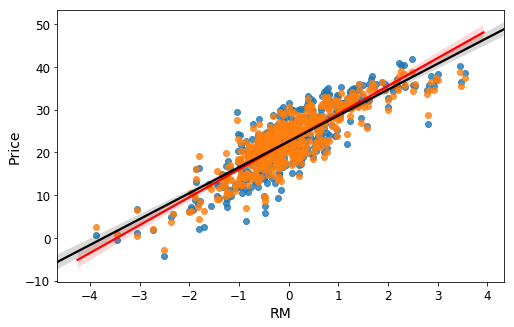

In [15]:
lin_reg = LinearRegression()
predict_no_reg = cross_val_predict(lin_reg, X, np.ravel(y), cv = 5)

lin_reg_enet = ElasticNet(alpha = 0.1, l1_ratio = 0.3)
predict_enet = cross_val_predict(lin_reg_enet, X, np.ravel(y), cv = 5)

line_color_1 = {'color': 'red'}
line_color_2 = {'color': 'black'}

fig, ax = plt.subplots(1, 1, figsize = (8, 5))
sb.regplot(X['RM'], np.ravel(predict_no_reg), line_kws = line_color_1)
sb.regplot(X['RM'], np.ravel(predict_enet), line_kws = line_color_2)
plt.ylabel('Price')

# Compare predicted values to actual values

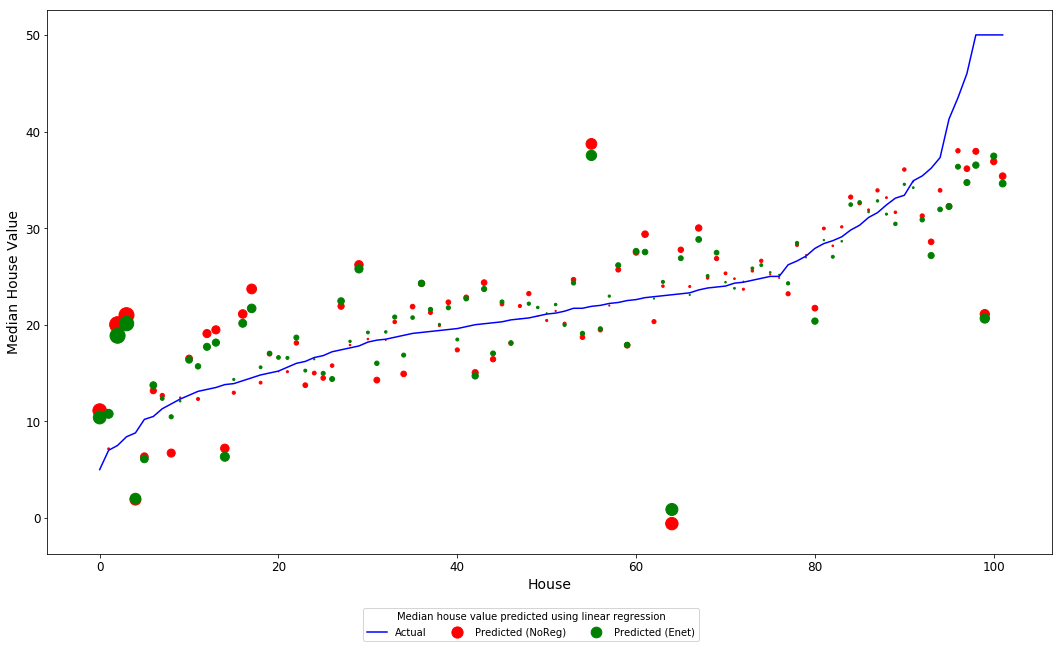

In [16]:
predict_df = y.copy()
predict_df['PredictedMEDV-NoReg'] = predict_no_reg
predict_df['PredictedMEDV-Enet'] = predict_enet

N = 5  # Plot every Nth value to save time and space
predict_df = predict_df.sort_values('target')[::N]

predict_df['diff-noreg'] = predict_df['target'] - predict_df['PredictedMEDV-NoReg']
predict_df['recnum'] = np.arange(len(predict_df))
predict_df['error_pct-noreg'] = abs(predict_df['diff-noreg'] / predict_df['target']) * 150

predict_df['diff-enet'] = predict_df['target'] - predict_df['PredictedMEDV-Enet']
predict_df['error_pct-enet'] = abs(predict_df['diff-enet'] / predict_df['target']) * 150

ax = plt.figure(figsize = [18, 10])
plt.ylabel('Median House Value')
plt.xlabel('House')
plt.plot(predict_df['recnum'], predict_df['target'], color = 'blue');
plt.scatter(predict_df['recnum'],
            predict_df['PredictedMEDV-NoReg'], 
            predict_df['error_pct-noreg'], 
            color = 'red');
plt.scatter(predict_df['recnum'],
            predict_df['PredictedMEDV-Enet'], 
            predict_df['error_pct-enet'], 
            color = 'green');

ax.legend(['Actual', 'Predicted (NoReg)', 'Predicted (Enet)'], 
           loc = 'lower center',
           ncol = 3, 
           title = 'Median house value predicted using linear regression')

plt.show()